Student Performance Indicator

Problem Statement

-> This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

Data Collection

->Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

In [1]:
# importing packages and data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data//stud.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.sample(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
347,female,group C,bachelor's degree,standard,completed,77,94,95
850,male,group C,master's degree,standard,none,71,67,67
499,male,group E,some college,standard,none,76,71,72
918,female,group C,associate's degree,standard,completed,57,77,80
423,female,group A,some high school,standard,completed,59,85,80
159,male,group D,associate's degree,free/reduced,none,66,62,64
966,male,group A,some high school,standard,completed,66,68,64
517,female,group E,some college,standard,completed,66,74,73
482,male,group C,some college,free/reduced,none,68,68,61
859,male,group C,associate's degree,free/reduced,none,87,73,72


In [7]:
df.shape

(1000, 8)

In [8]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [15]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [16]:
df[df['math score']==0]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10


In [18]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [19]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [20]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [21]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [22]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [28]:
# numeric and categorical columns

numerical_col = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_col = [feature for feature in df.columns if df[feature].dtype=='O']


In [29]:
numerical_col

['math score', 'reading score', 'writing score']

In [30]:
categorical_col

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [31]:
# adding columns

df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['avg'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,avg
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


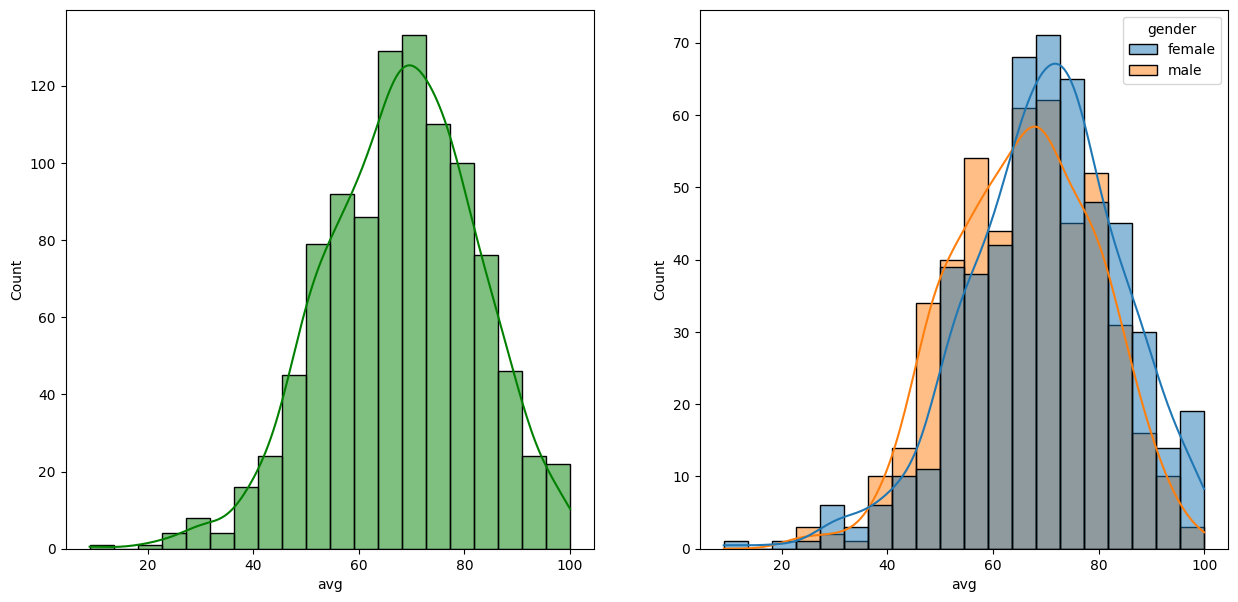

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='avg',bins=20,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='avg',bins=20,kde=True,hue='gender')
plt.show()

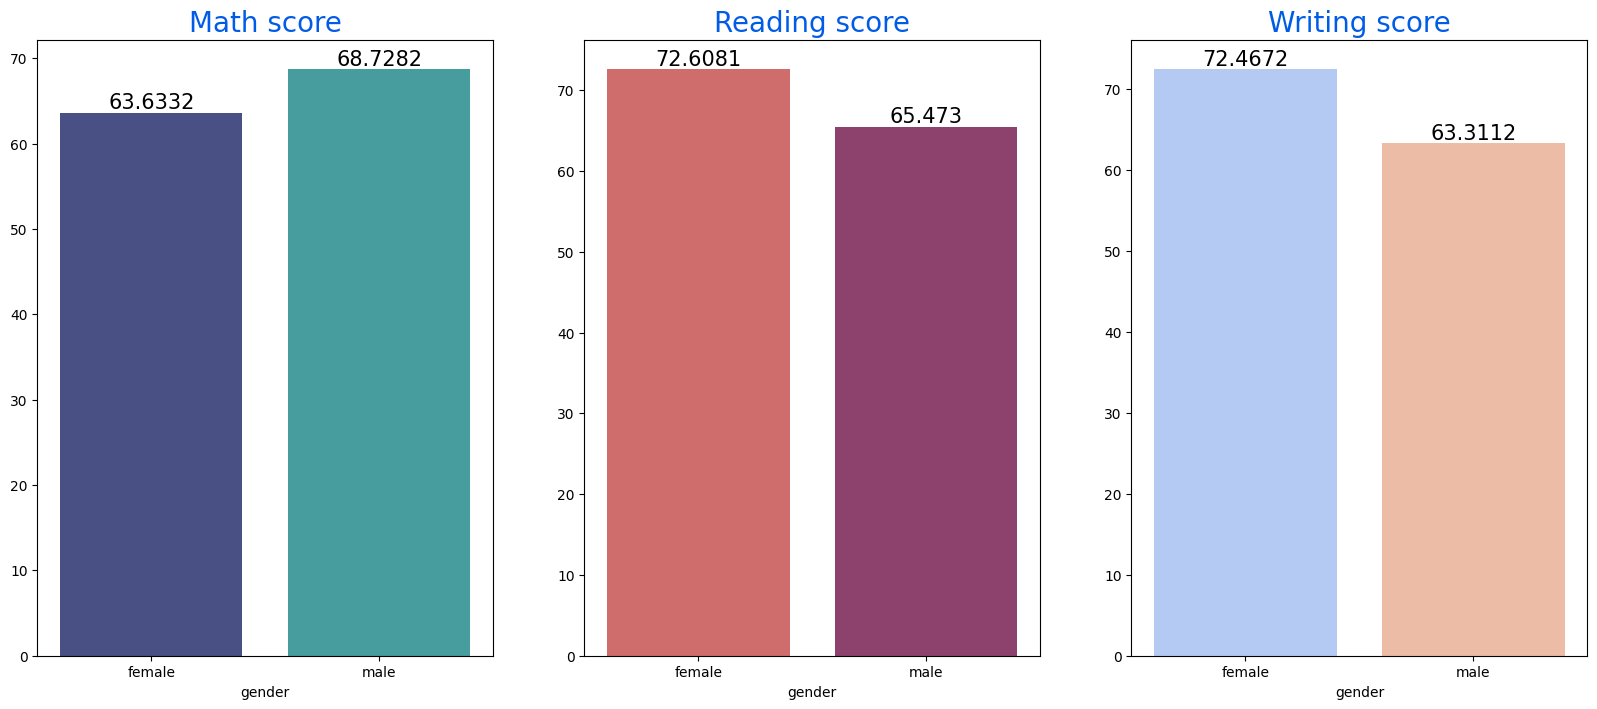

In [102]:
Group_data=df.groupby('gender')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data['math score'].mean().index,y=Group_data['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data['reading score'].mean().index,y=Group_data['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data['writing score'].mean().index,y=Group_data['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

avg of female students is better than male students.

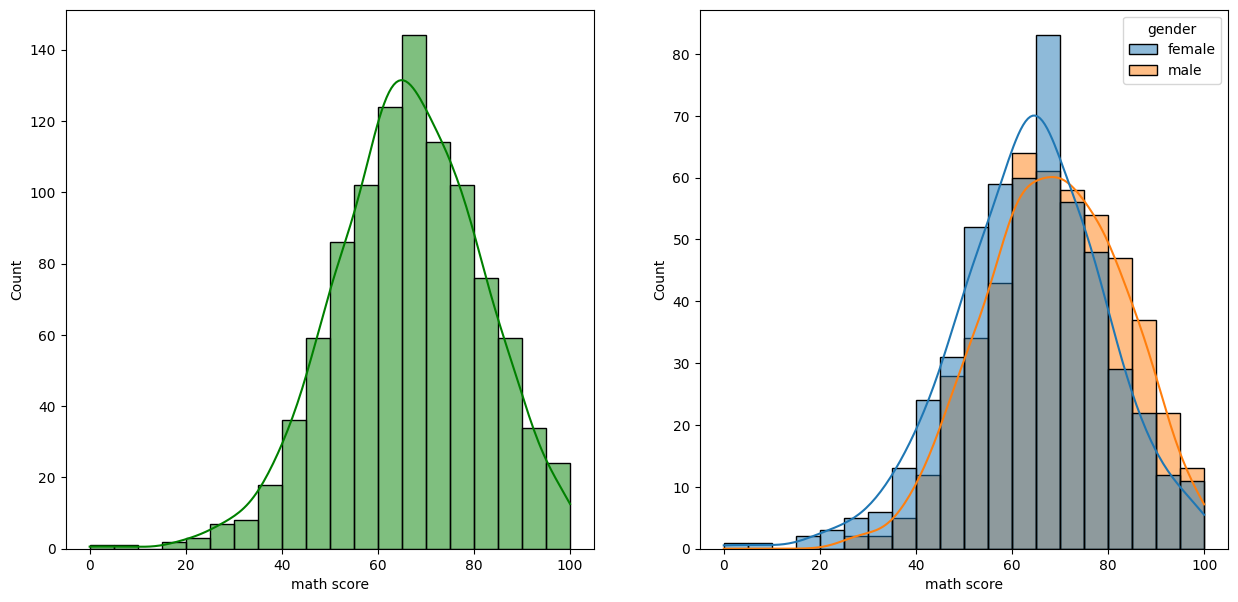

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='math score',bins=20,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='math score',bins=20,kde=True,hue='gender')
plt.show()

male students have a better math score

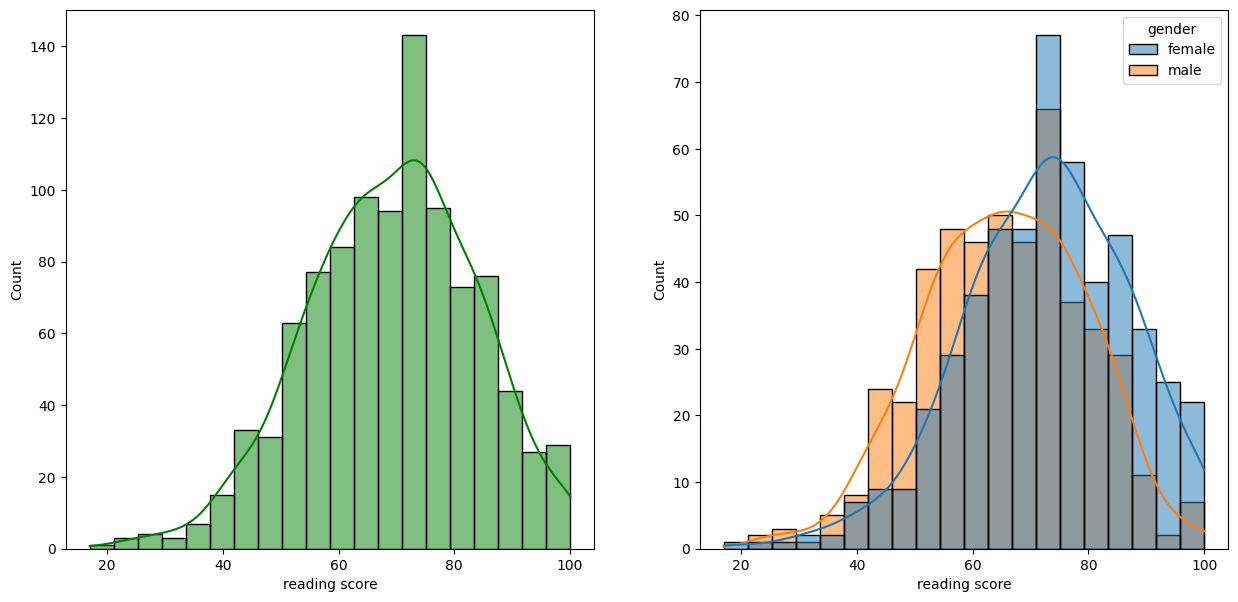

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='reading score',bins=20,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='reading score',bins=20,kde=True,hue='gender')
plt.show()

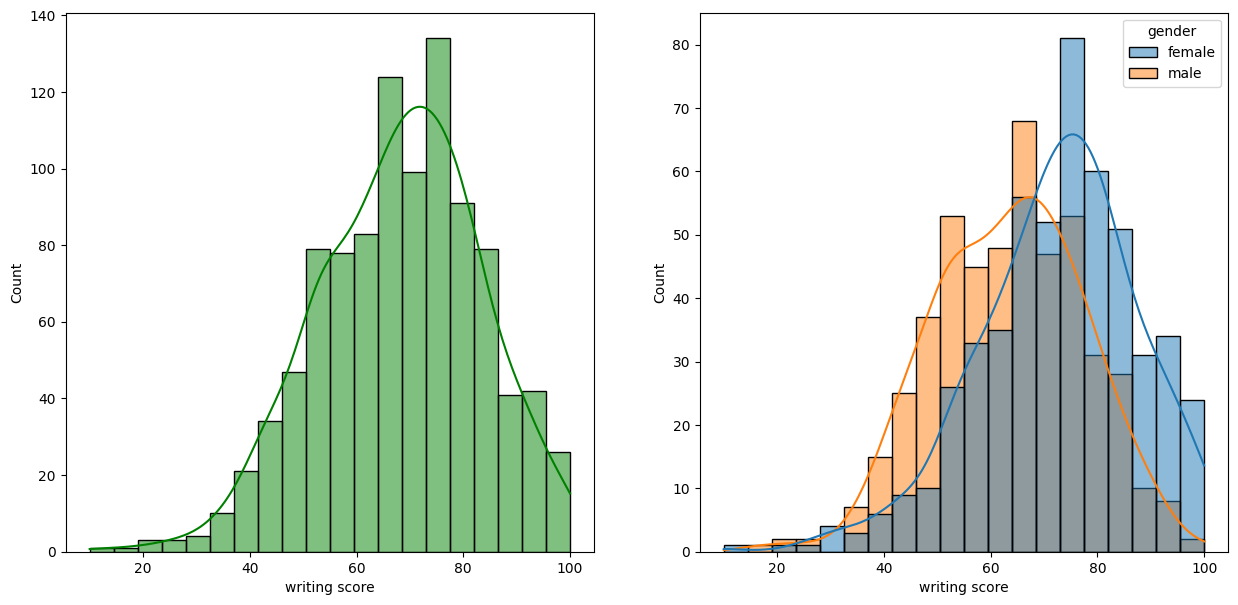

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='writing score',bins=20,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='writing score',bins=20,kde=True,hue='gender')
plt.show()

female students have better reading and writing score

C:\Users\sunri\AppData\Local\Temp\ipykernel_11392\2426393163.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\sunri\AppData\Local\Temp\ipykernel_11392\2426393163.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\sunri\AppData\Local\Temp\ipykernel_11392\2426393163.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


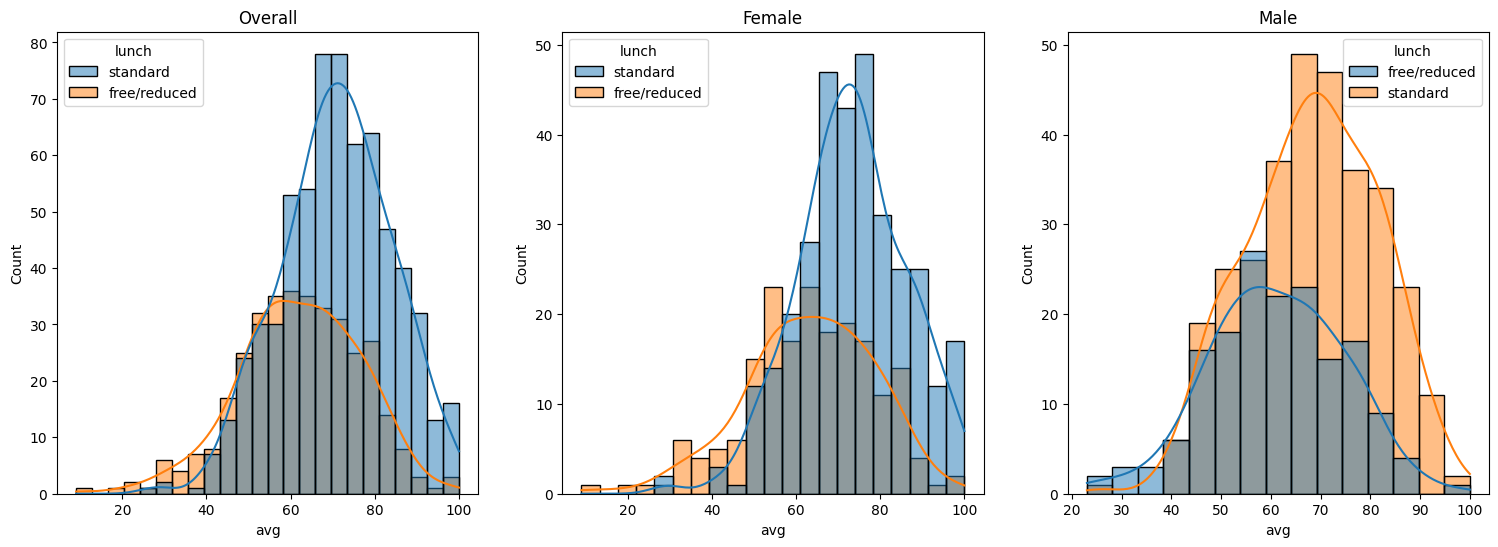

In [52]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax = sns.histplot(data=df,x='avg',kde=True,hue='lunch').set_title('Overall')
plt.subplot(142)
ax = sns.histplot(data=df[df.gender=='female'],x='avg',kde=True,hue='lunch').set_title('Female')
plt.subplot(143)
ax = sns.histplot(data=df[df.gender=='male'],x='avg',kde=True,hue='lunch').set_title('Male')
plt.show()

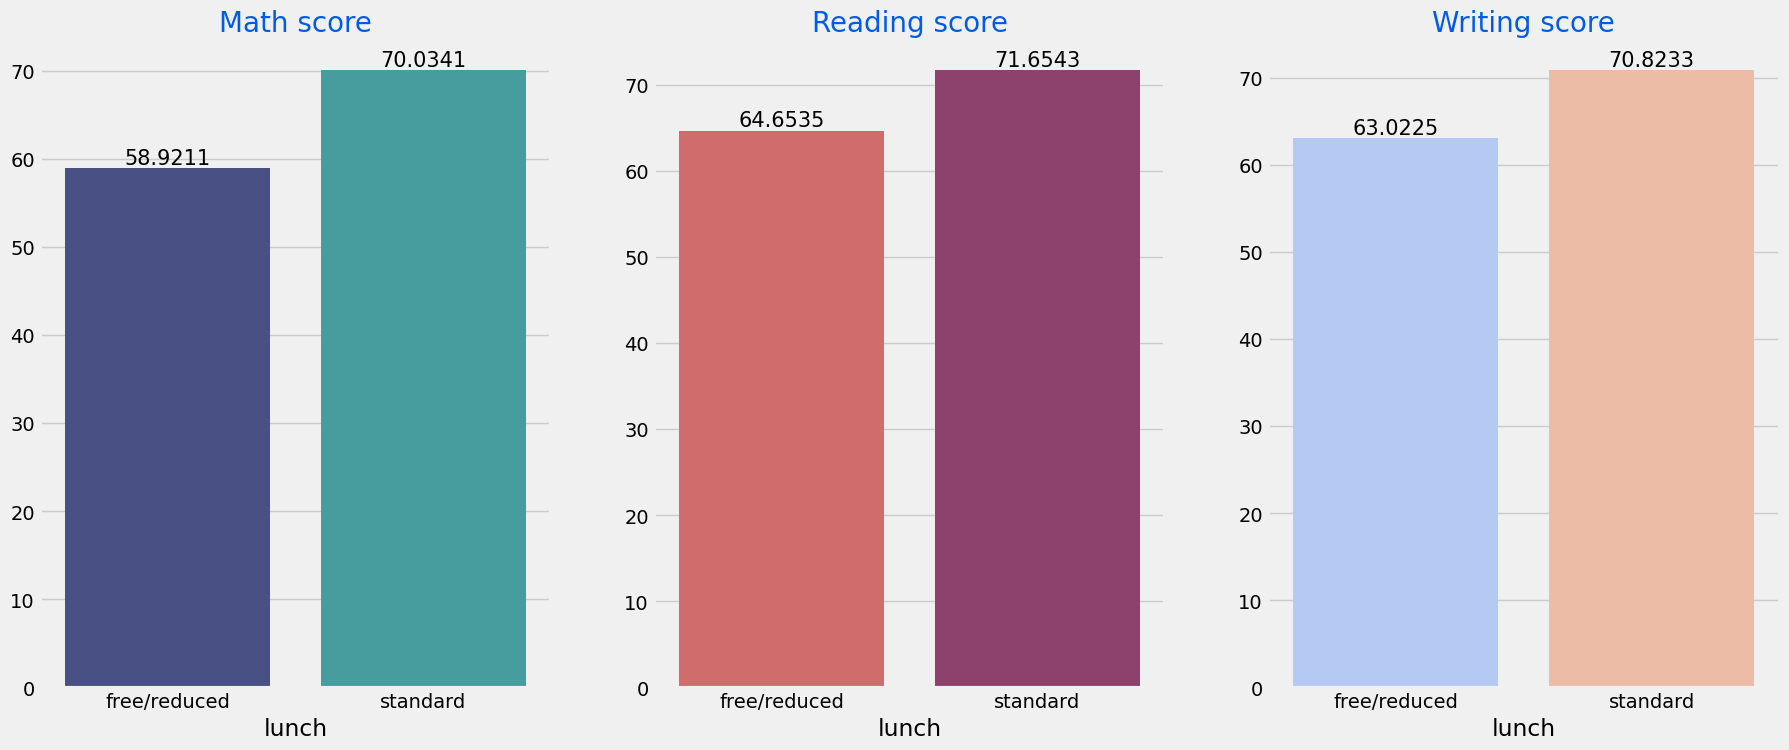

In [107]:
Group_data3=df.groupby('lunch')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data3['math score'].mean().index,y=Group_data3['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data3['reading score'].mean().index,y=Group_data3['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data3['writing score'].mean().index,y=Group_data3['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

standard lunch helps to perform better regardless of gender.

C:\Users\sunri\AppData\Local\Temp\ipykernel_11392\345454136.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\sunri\AppData\Local\Temp\ipykernel_11392\345454136.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\sunri\AppData\Local\Temp\ipykernel_11392\345454136.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


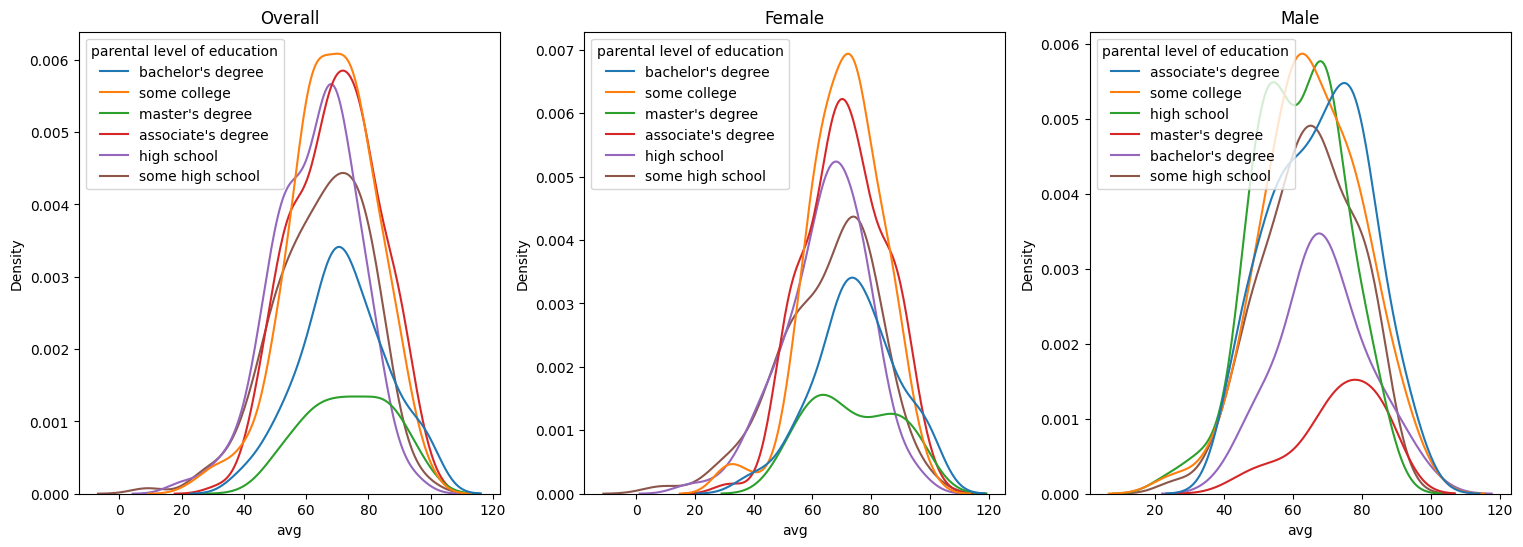

In [66]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.kdeplot(data=df,x='avg',hue='parental level of education',fill=False).set_title('Overall')
plt.subplot(142)
ax =sns.kdeplot(data=df[df.gender=='female'],x='avg',hue='parental level of education',fill=False).set_title('Female')
plt.subplot(143)
ax =sns.kdeplot(data=df[df.gender=='male'],x='avg',hue='parental level of education',fill=False).set_title('Male')
plt.show()

parent's level of education dosen't have a big effect on the score

C:\Users\sunri\AppData\Local\Temp\ipykernel_11392\2637156743.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\sunri\AppData\Local\Temp\ipykernel_11392\2637156743.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\sunri\AppData\Local\Temp\ipykernel_11392\2637156743.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


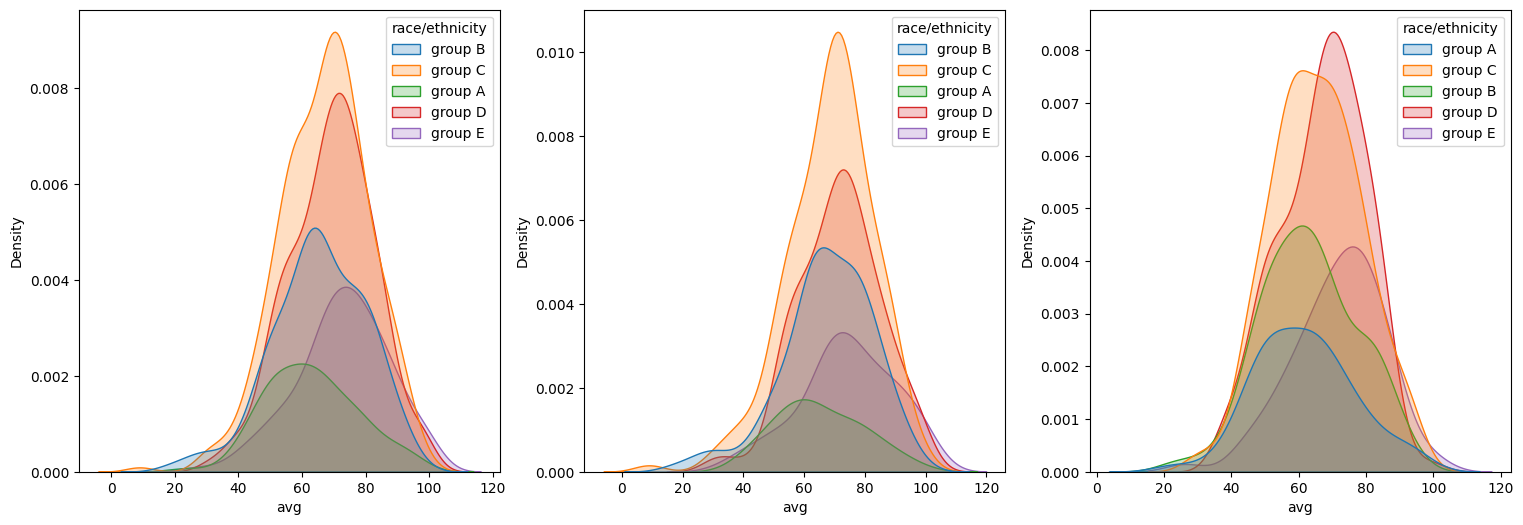

In [64]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.kdeplot(data=df,x='avg',fill=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.kdeplot(data=df[df.gender=='female'],x='avg',fill=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.kdeplot(data=df[df.gender=='male'],x='avg',fill=True,hue='race/ethnicity')
plt.show()

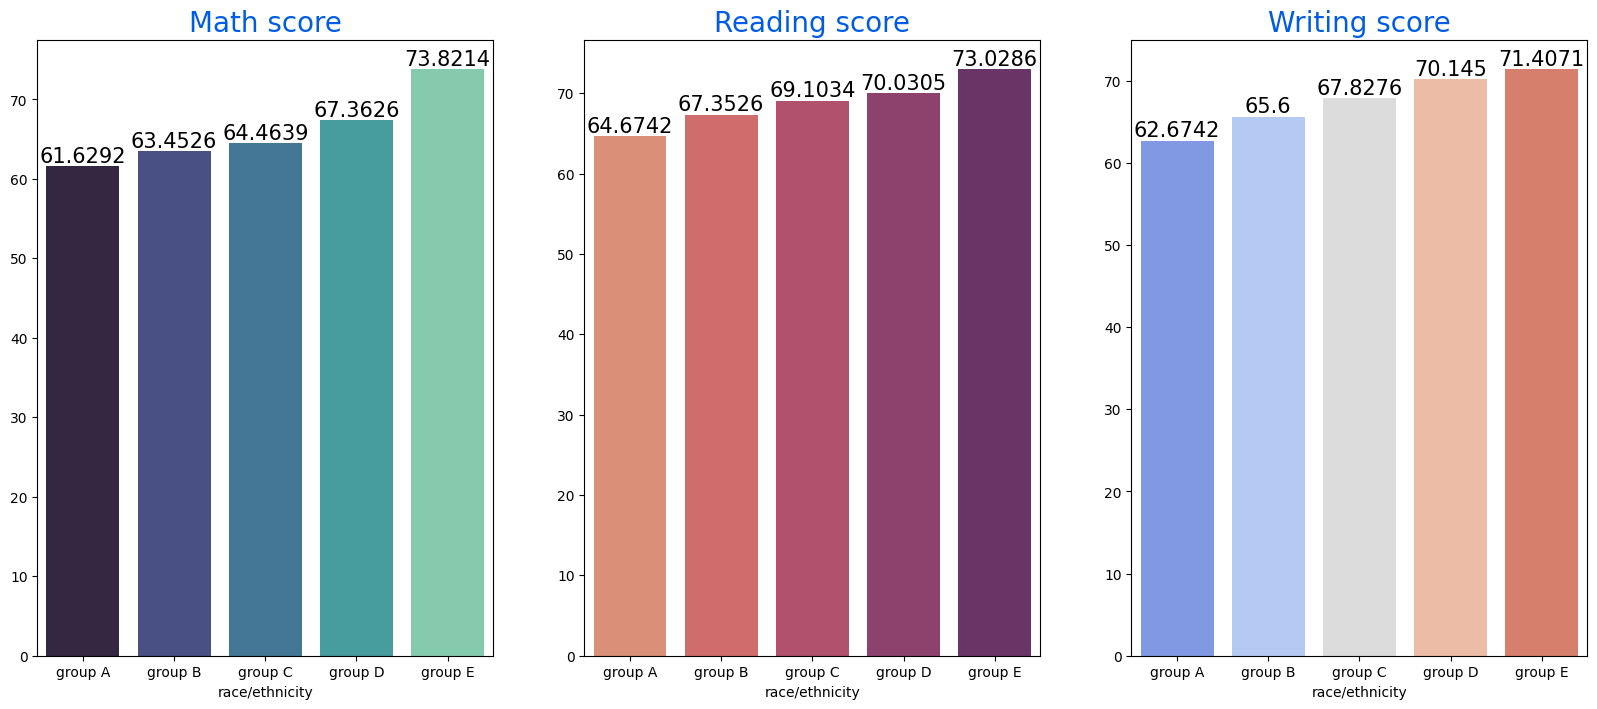

In [97]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

students of group A and B score slightly less

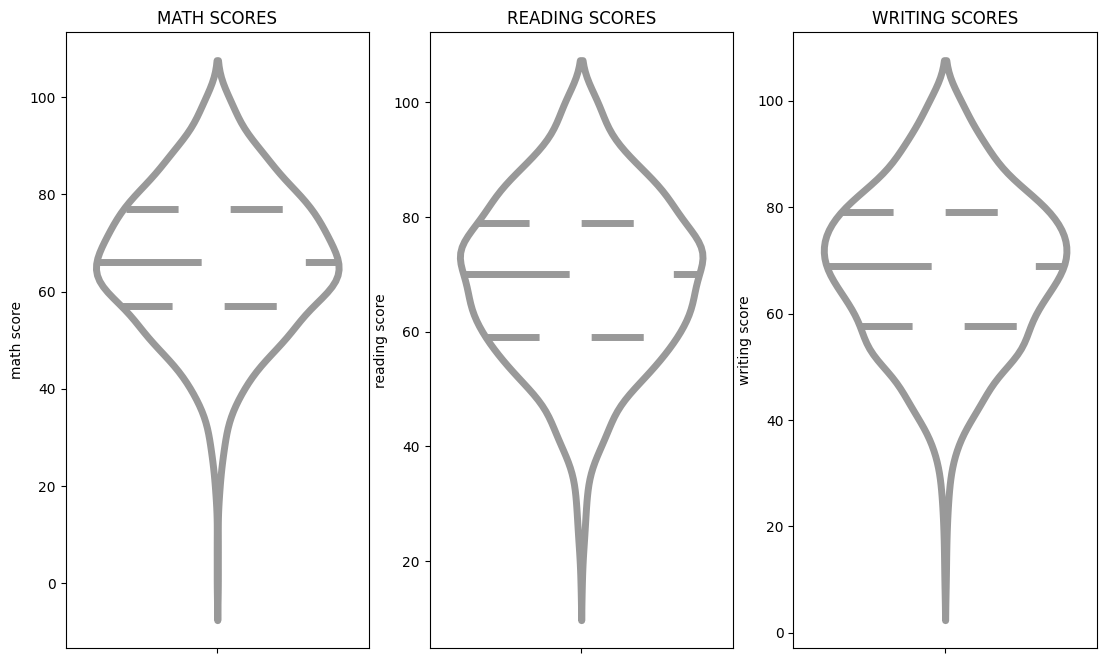

In [84]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='white',linewidth=5,fill=False,inner='quartile')
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='white',linewidth=5,fill=False,inner='quartile')
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='white',linewidth=5,fill=False,inner='quartile')
plt.show()

most students score between 60 to 80 in all 3 exams

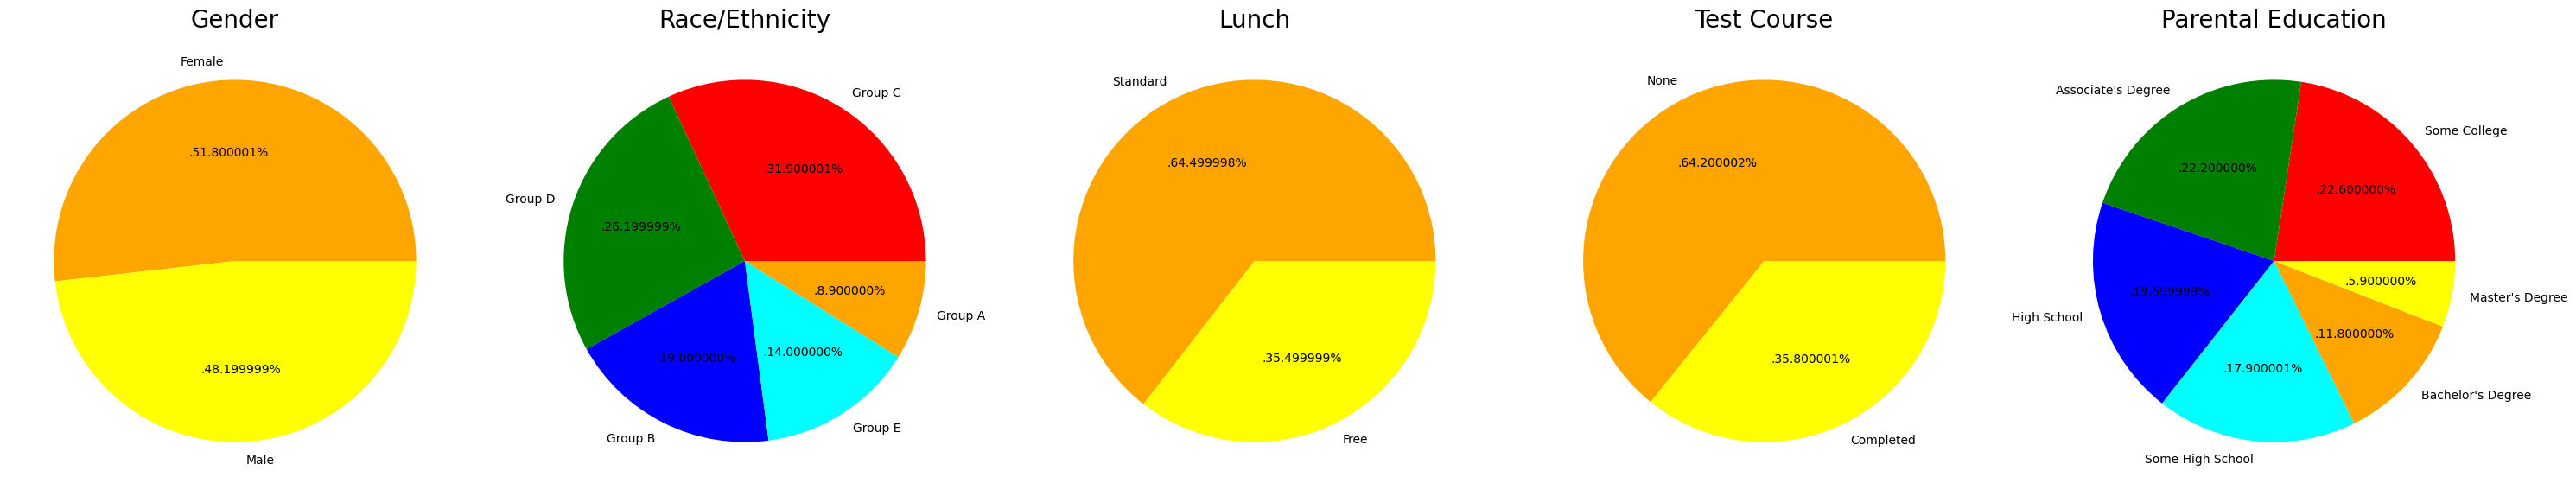

In [90]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['orange','yellow']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['orange','yellow']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['orange','yellow']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','yellow']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

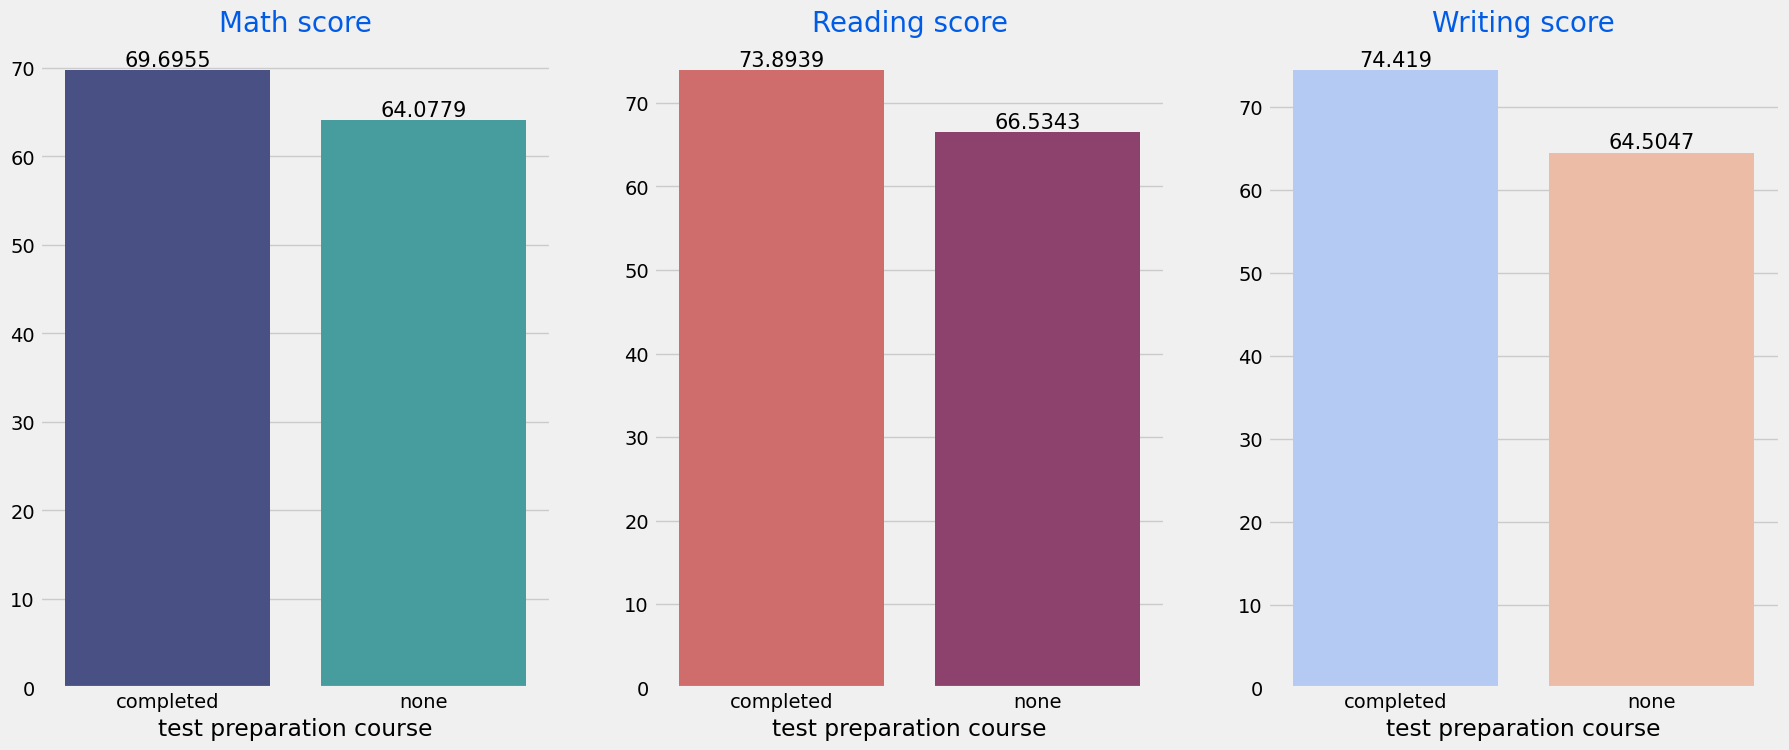

In [112]:
Group_data4=df.groupby('test preparation course')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data4['math score'].mean().index,y=Group_data4['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data4['reading score'].mean().index,y=Group_data4['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data4['writing score'].mean().index,y=Group_data4['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

-> no of male and female students is almost equal.
-> group C has most students.
-> more students have standard lunch.
-> more students have not taken the test course.
-> less students with parents having masters or bachelors degree.

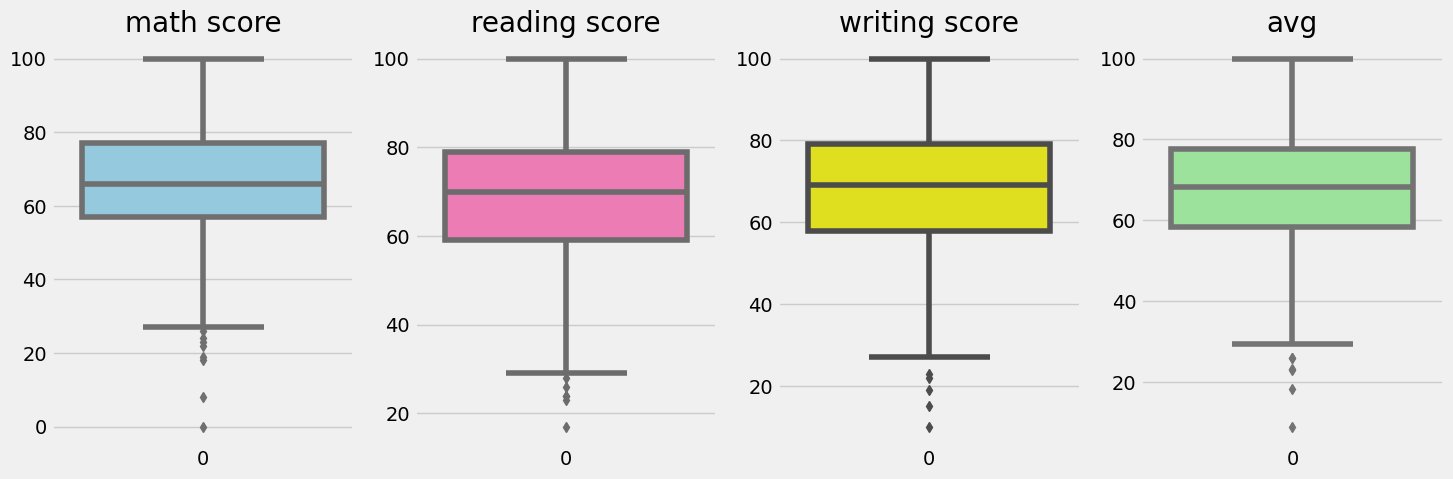

In [110]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue').set_title('math score')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink').set_title('reading score')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow').set_title('writing score')
plt.subplot(144)
sns.boxplot(df['avg'],color='lightgreen').set_title('avg')
plt.show()

d:\ML_PROJECT_END_TO_END\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


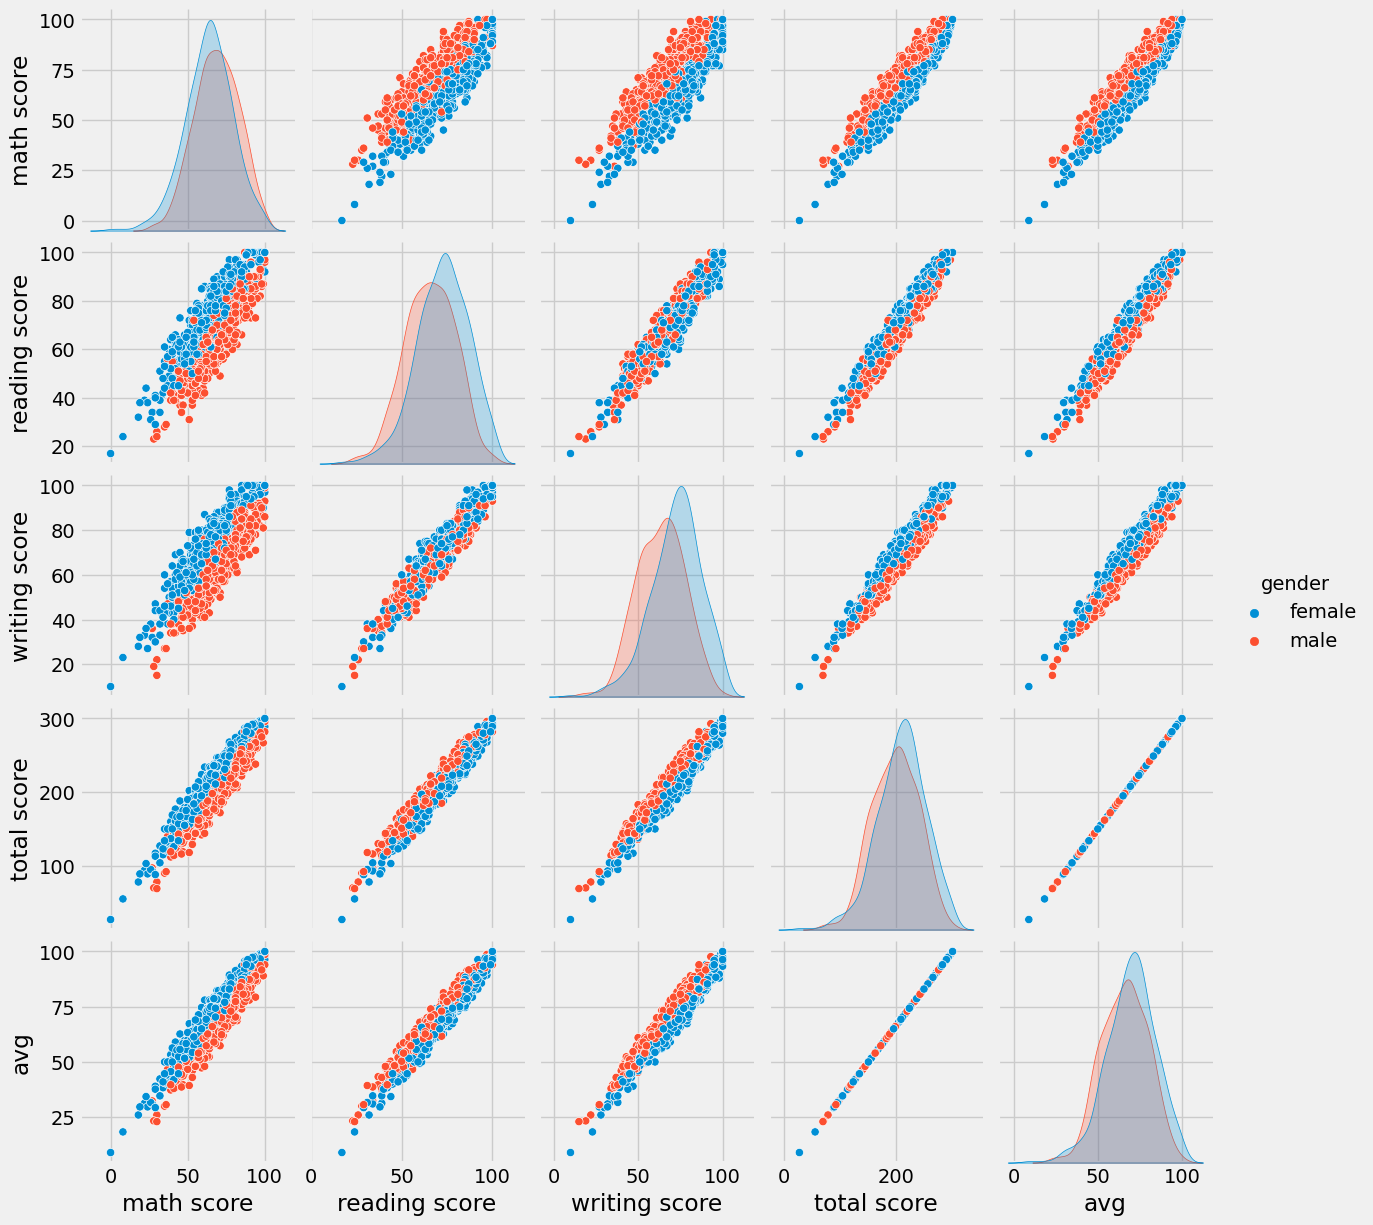

In [111]:
sns.pairplot(df,hue = 'gender')
plt.show()

all scores have a positive linear relation